# Ecommerce_UK_Retail EDA 



## Batch : 20DEC03
###    Name : Mrunali Potdar

In [1]:
# Import all required librery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read Dataset

df = pd.read_csv(r'F:\board Infinity\Python\ML\Ecommerce_UK_Retailer.csv',encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Remove negative quantity
df = df[df.Quantity > 0]

In [4]:
# Data should not have null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [5]:
# Drop null customer id's because they are of not use.
df.dropna(how = 'any', subset = ['CustomerID'], inplace = True, axis=0)

In [6]:
# replace null description with not available
df['Description'] = df.fillna(value = "Not Available")

In [7]:
# check once again is there any negative value
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [9]:
# change datatype of CustomerID
df['CustomerID'] = df['CustomerID'].astype('object')
df['CustomerID'].dtype

dtype('O')

In [10]:
# change datatype of Invoice date
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [11]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [12]:
# sepreate numeric feature

numeric_feature = [feature for feature in df.columns if df[feature].dtypes !='O' and  df[feature].dtypes !='<M8[ns]']
print("length of numeric variables : ",len(numeric_feature))
df[numeric_feature].head()

length of numeric variables :  2


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [13]:
# Sperate Date feature
date_feature = [feature for feature in df.columns if df[feature].dtypes =='<M8[ns]']
print("length of numeric variables : ",len(date_feature))
df[date_feature].head()

length of numeric variables :  1


,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [14]:
# Sperate Categorical feature
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("length of numeric variables : ",len(categorical_feature))
df[categorical_feature].head()

length of numeric variables :  5


,InvoiceNo,StockCode,Description,CustomerID,Country
0,536365,85123A,536365,17850,United Kingdom
1,536365,71053,536365,17850,United Kingdom
2,536365,84406B,536365,17850,United Kingdom
3,536365,84029G,536365,17850,United Kingdom
4,536365,84029E,536365,17850,United Kingdom


In [15]:
# Continuous Feature

continuous_feature=[feature for feature in numeric_feature if feature not in categorical_feature+date_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


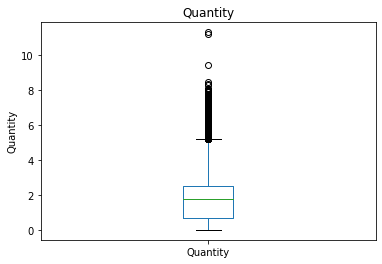

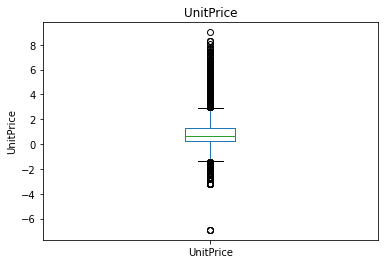

In [16]:
# a. Boxplot – All Numeric Variables 

for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature,grid=False)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

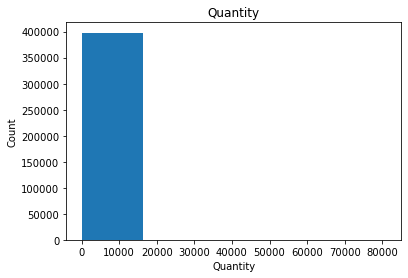

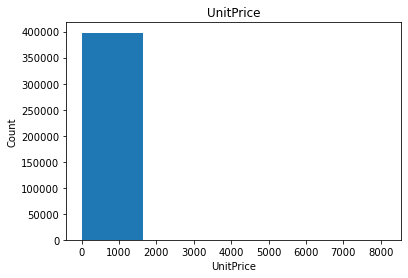

In [17]:
# b. Histogram – All Numeric Variables 

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=5,grid=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

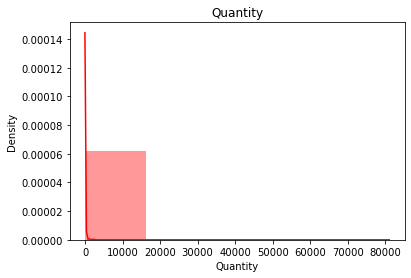

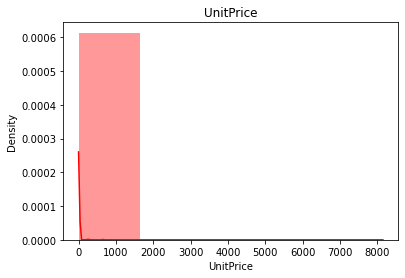

In [18]:
# c. Distribution Plot – All Numeric Variables

for feature in continuous_feature:
    plt.figure()
    sns.distplot(data[feature],bins=5,color="Red")
    plt.xlabel(feature)
    plt.title(feature)


In [19]:
# d. Aggregation for all numerical Columns

for feature in continuous_feature:
    print("{}:\n".format(feature),df[feature].describe())

Quantity:
 count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
UnitPrice:
 count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


In [20]:
# Unique values in all columns
for a in df:
    print("{}".format(a),df[a].unique())

InvoiceNo ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
Description ['536365' '536366' '536367' ... '581585' '581586' '581587']
Quantity [    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    72   200
   600   480    14    11    70   252    60   216   384    27   108    52
    75   270    42   240    90   320    17  1824   204    69   160  2880
  1400    19    39    56    13  1440    15   720   156   324    41   402
   378   150   300    22    34   408   972   208  1008    26  1000  1488
   250  1394   400   110    37    78    21   272    84    47  1728    38
    53    76   576    29  2400   500   180   960  1296   147   168   256
    54    31   860  1010  1356  1284   186   114   360  1930  2000  3114
  1300   670   176   648    62 74215    89    33    

In [21]:
# f. Duplicate values across all columns 
duplicates = df[df.duplicated()]
print(duplicates)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
517       536409     21866      536409         1 2010-12-01 11:45:00   
527       536409     22866      536409         1 2010-12-01 11:45:00   
537       536409     22900      536409         1 2010-12-01 11:45:00   
539       536409     22111      536409         1 2010-12-01 11:45:00   
555       536412     22327      536412         1 2010-12-01 11:49:00   
...          ...       ...         ...       ...                 ...   
541675    581538     22068      581538         1 2011-12-09 11:34:00   
541689    581538     23318      581538         1 2011-12-09 11:34:00   
541692    581538     22992      581538         1 2011-12-09 11:34:00   
541699    581538     22694      581538         1 2011-12-09 11:34:00   
541701    581538     23343      581538         1 2011-12-09 11:34:00   

        UnitPrice CustomerID         Country  
517          1.25      17908  United Kingdom  
527          2.10      17908  United King

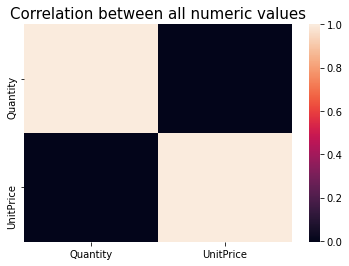

In [22]:
# g. Correlation – Heatmap - All Numeric Variables

sns.heatmap(df[continuous_feature].corr())
plt.title("Correlation between all numeric values",fontsize=15)
plt.show()

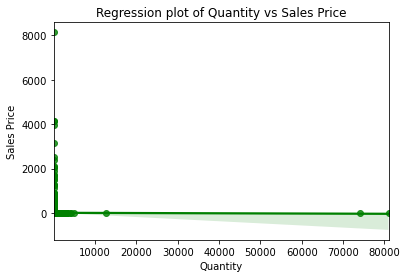

In [23]:
# h. Regression Plot - All Numeric Variables

sns.regplot(x=df['Quantity'],y=df['UnitPrice'],data=df,color='g')
plt.xlabel("Quantity",fontsize=10)
plt.ylabel("Sales Price",fontsize=10)
plt.title("Regression plot of Quantity vs Sales Price")
plt.show()

Text(0.5, 1.0, 'Total UnitPrice By Country ')

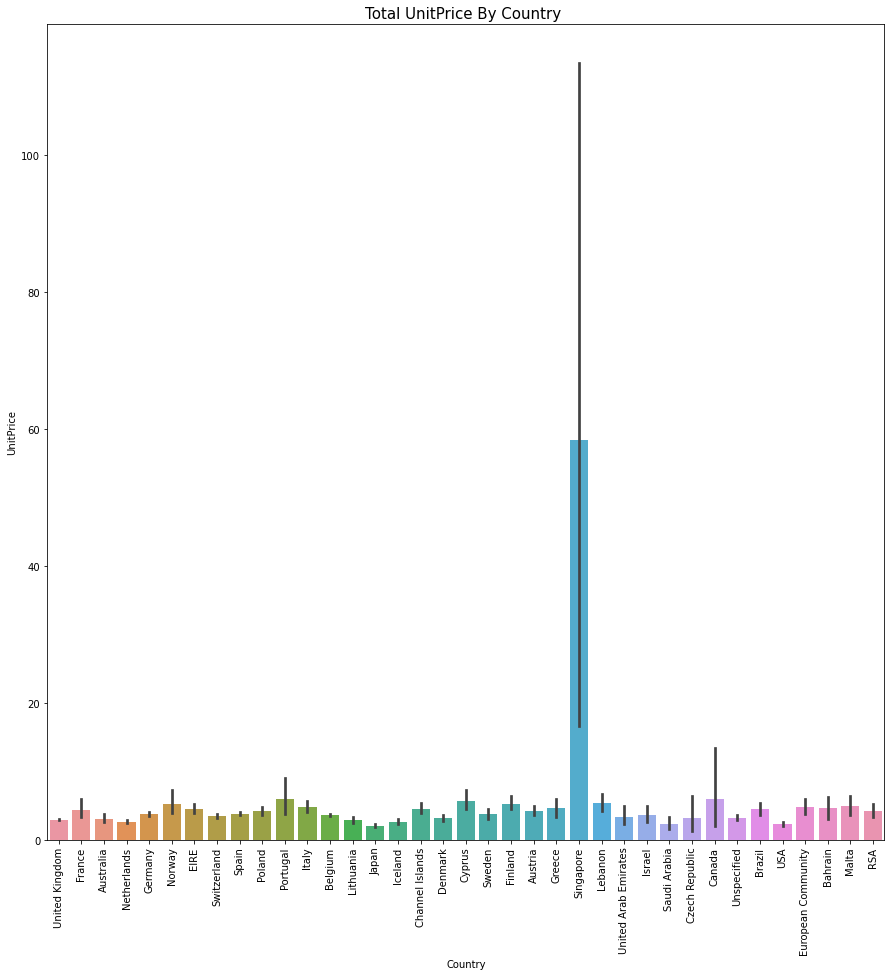

In [24]:
# Bar Plot – Every Categorical Variable vs every Numerical Variable 
plt.figure(figsize=(15,15))
sns.barplot(x= df['Country'], y=df['UnitPrice'])
plt.xlabel("Country",fontsize=10)
plt.xticks(rotation=90)
plt.ylabel("UnitPrice",fontsize=10)
plt.title("Total UnitPrice By Country ",fontsize=15)


In [25]:
# Extract date,month,year,time from InvoiceDate

df["Month"] = df.InvoiceDate.dt.month
df["Day"] = df.InvoiceDate.dt.day_name()
df["Year"] = df.InvoiceDate.dt.year
df["Hour"] = df.InvoiceDate.dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Hour
0,536365,85123A,536365,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,Wednesday,2010,8
1,536365,71053,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,2010,8
2,536365,84406B,536365,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,Wednesday,2010,8
3,536365,84029G,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,2010,8
4,536365,84029E,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,Wednesday,2010,8


In [26]:
# How many orders made by the customers?

a = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False).head()
print(a)

      CustomerID         Country  InvoiceNo
4019     17841.0  United Kingdom       7847
1888     14911.0            EIRE       5677
1298     14096.0  United Kingdom       5111
334      12748.0  United Kingdom       4596
1670     14606.0  United Kingdom       2700


In [27]:
# TOP 5 customers with higher number of orders 
print(a.CustomerID )

4019    17841.0
1888    14911.0
1298    14096.0
334     12748.0
1670    14606.0
Name: CustomerID, dtype: float64


In [28]:
# How much money spent by the customers? 

b = df.groupby(by=['CustomerID'],as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False).head()
print(b)

      CustomerID  UnitPrice
1290     14096.0   33332.45
1880     14911.0   26185.72
4011     17841.0   19848.49
324      12744.0   12949.99
326      12748.0   12205.60


In [29]:
# . TOP 5 customers with highest money spent 
print(b)

      CustomerID  UnitPrice
1290     14096.0   33332.45
1880     14911.0   26185.72
4011     17841.0   19848.49
324      12744.0   12949.99
326      12748.0   12205.60


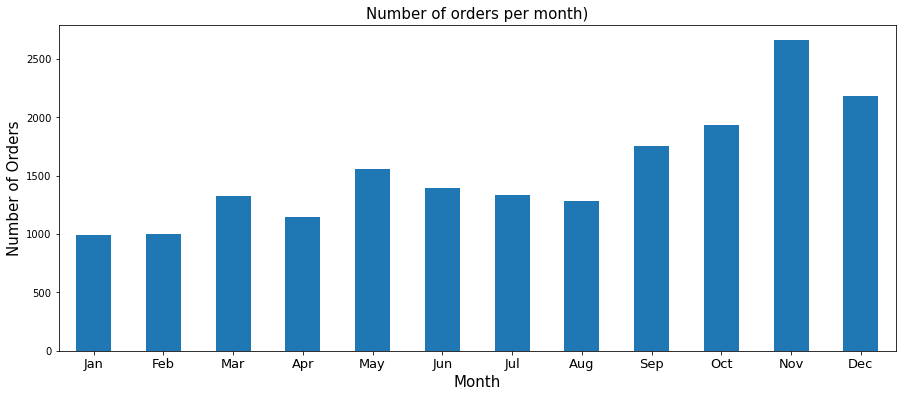

In [30]:
# 10. How many orders per month? 

label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


ax = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per month)',fontsize=15)
ax.set_xticklabels(label, rotation='horizontal', fontsize=13)
plt.show()

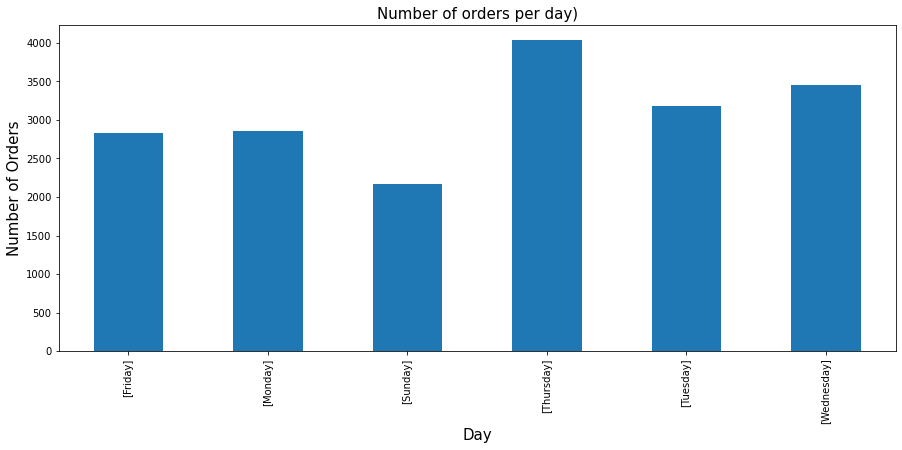

In [31]:
# How many orders per day? 

ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()
ax.plot(kind='bar',figsize=(15,6))
plt.xlabel('Day',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders per day)',fontsize=15)
plt.show()

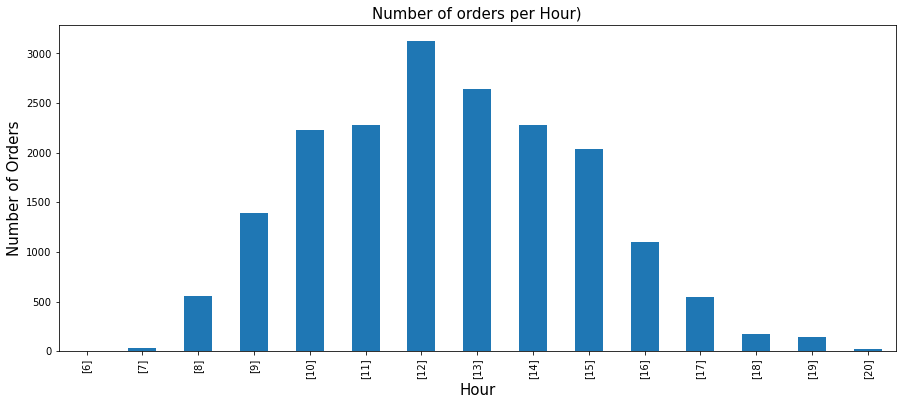

In [32]:
# How many orders per hour? 

hour = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()
hour.plot(kind='bar',figsize=(15,6))
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders per Hour)',fontsize=15)
plt.show()

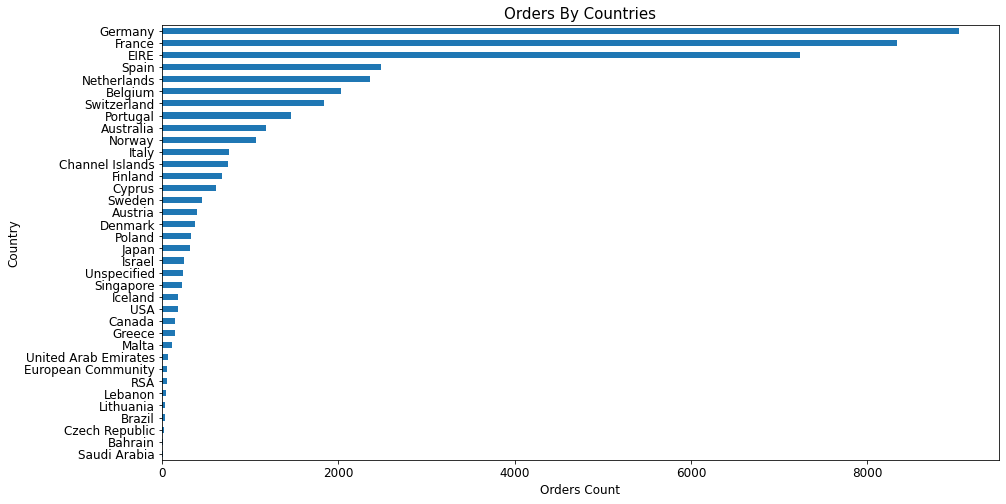

In [33]:
# 13. How many orders for each country?

group_country_amount_spent = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Orders Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Orders By Countries', fontsize=15)
plt.show()

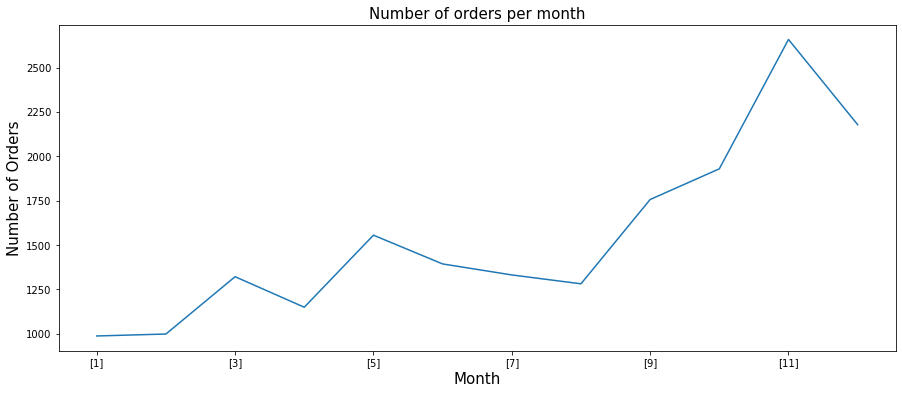

In [34]:
# Orders trend across months 

ax = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='line',figsize=(15,6))
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders per month',fontsize=15)
plt.show()

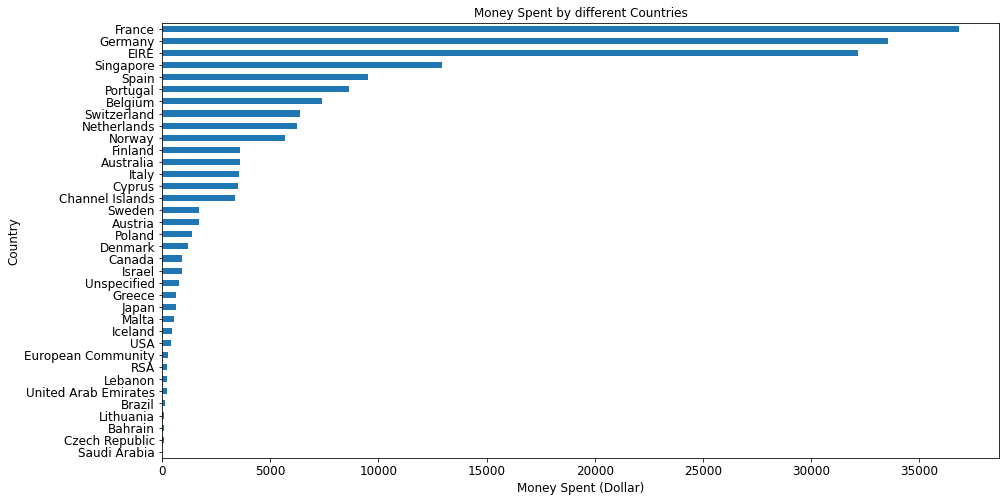

In [35]:
# How much money spent by each country? 

group_country_amount_spent = df.groupby('Country')['UnitPrice'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()